<a href="https://colab.research.google.com/github/devbabbar7/Machine-learning-programs/blob/main/Forecasting%20insurance%20cost%20via%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 27.6MB/s]


In [ ]:
!mkdir Dataset
!cp /content/insurance.zip
!unzip -q /content/insurance.zip -d /content/Dataset
!rm /content/insurance.zip

cp: missing destination file operand after '/content/insurance.zip'
Try 'cp --help' for more information.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/Dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data["sex"].replace({"female":1,"male":0},inplace=True)
data["smoker"].replace({"yes":1,"no":0},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
x=data.iloc[:,:-1].values 
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Reshape and scale the target variable
y_train = ss.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = ss.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
print(len(x_train[0]))

6


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="linear"))
model.add(tf.keras.layers.Dense(1, activation="linear"))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

In [ ]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
34/34 [==============================] - 4s 60ms/step - loss: 0.8644 - mse: 0.8644 - val_loss: 0.8618 - val_mse: 0.8618
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 0.7762 - mse: 0.7762 - val_loss: 0.7354 - val_mse: 0.7354
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 0.6662 - mse: 0.6662 - val_loss: 0.5898 - val_mse: 0.5898
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 0.5423 - mse: 0.5423 - val_loss: 0.4494 - val_mse: 0.4494
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4313 - mse: 0.4313 - val_loss: 0.3372 - val_mse: 0.3372
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3505 - mse: 0.3505 - val_loss: 0.2722 - val_mse: 0.2722
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3038 - mse: 0.3038 - val_loss: 0.2421 - val_mse: 0.2421
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 0.2760 - 

In [ ]:
output = []
import numpy as np
for num in range(len(x_test)):
  reshaped = np.reshape(x_test[num], (1,-1))
  prediction = model.predict(reshaped)
  unscaled_prediction = ss.inverse_transform(prediction)
  output.append(unscaled_prediction)
print(output)

1/1 [==============================] - 0s 21ms/step
[array([[11183.321]], dtype=float32), array([[4802.5234]], dtype=float32), array([[32788.37]], dtype=float32), array([[10073.801]], dtype=float32), array([[29682.34]], dtype=float32), array([[4640.7705]], dtype=float32), array([[3362.588]], dtype=float32), array([[13183.771]], dtype=float32), array([[5247.0244]], dtype=float32), array([[12592.89]], dtype=float32), array([[16475.994]], dtype=float32), array([[7909.0815]], dtype=float32), array([[4345.293]], dtype=float32), array([[47178.34]], dtype=float32), array([[51016.76]], dtype=float32), array([[46415.676]], dtype=float32), array([[9948.47]], dtype=float32), array([[44907.098]], dtype=float32), array([[10923.844]], dtype=float32), array([[25028.537]], dtype=float32), array([[5620.6924]], dtype=float32), array([[6738.8384]], dtype=float32), array([[3022.5957]], dtype=float32), array([[4616.749]], dtype=float32), array([[13977.]], dtype=float32), array([[12621.381]], dtype=float32)

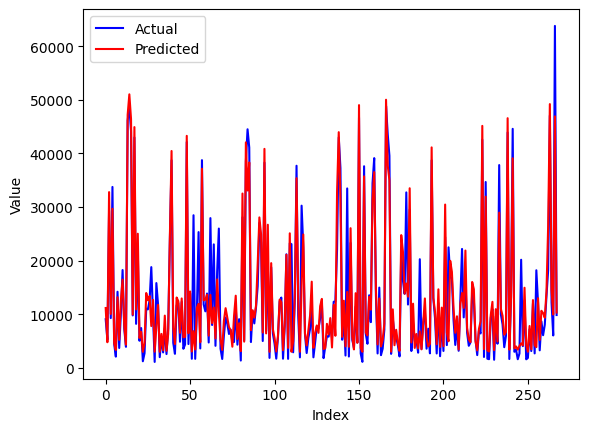

In [ ]:
y_output = ss.inverse_transform(y_test.reshape(-1, 1)).flatten()
import matplotlib.pyplot as plt

output = np.reshape(output, (-1,))  # Reshape output to match the shape of y_test

plt.plot(range(len(y_test)), y_output, color='blue', label='Actual')
plt.plot(range(len(output)), output, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()